In [90]:
!pip3 install numpy pandas matplotlib sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
data_path = r'data.csv'
df = pd.read_csv(data_path)

In [91]:
def rate_of_change(column, steps, bl):
    
    column_temp = np.array(column.copy())
    column = np.array(column)
    for i in range (steps):
        column_temp = np.delete(column_temp, 0)
        column_temp = np.append(column_temp, 0)
        
    if bl:
        return pd.Series(column - column_temp).astype(int)
    else:
        return pd.Series(column - column_temp)


def remove_step(column, steps):

    for i in range (steps):
        column = np.delete(column, -1)
        
    return column


def remove_last_row(size, step):
    return [i for i in range(size-1,size-step-1,-1)]

In [96]:
step = 1

df1 = df

y = rate_of_change(df1['index'],step,1)
x = df1.drop(columns = [df1.columns[0], 'index'])

for column in x.columns:
    x[column] = rate_of_change(df[column],step,0)
    
y = y.drop(remove_last_row(y.size,step))
x = x.drop(remove_last_row(y.size,step))

y = y.reset_index(drop=True)
x = x.reset_index(drop=True)

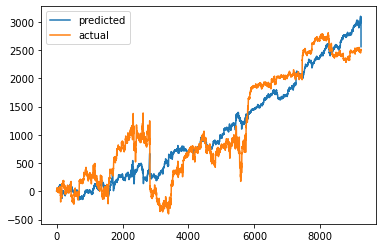

In [98]:
from sklearn.ensemble import RandomForestRegressor

predicted = []

x1 = [i for i in range(y.size)]

cv_size = 10

split = np.array_split(x1, cv_size)

for i in range(cv_size):
    xc = x.copy()
    yc = y.copy()
    cv_split = split[i].tolist()
    y_test = yc.iloc[cv_split]
    x_test = xc.iloc[cv_split]
    y_train = yc.drop(cv_split)
    x_train = xc.drop(cv_split)
    classifier = RandomForestRegressor()
    classifier.fit(x_train,y_train)
    predicted += classifier.predict(x_test).tolist()
    

y1 = np.array(predicted).cumsum()
y2 = np.array(y).cumsum()

plt.plot(x1, y1)
plt.plot(x1, y2)

plt.legend(["predicted", "actual"])